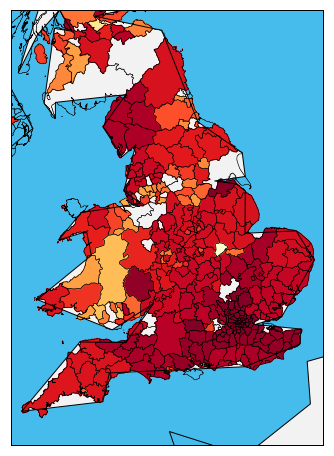

In [7]:
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.colors import rgb2hex
import numpy as np

def averagenum(num):
    '''calculate the average value of a list'''
    nsum = 0
    for i in range(len(num)):
        nsum += num[i]
    return nsum / len(num)

def readData():
    '''Read data from Train_rev1.csv and classify salary by location.
    generate location-salary dict
    '''
    file_name = 'Train_rev1.csv'
    location_dict = {}
    with open(file_name, encoding="ISO-8859-1") as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)
        for data in csv_reader:
            if data[0] == '':
                break
            if data[4] in location_dict.keys():
                location_dict[data[4]].append(int(data[10]))
            else:
                location_dict[data[4]] = [int(data[10])]
    csv_file.close()
    location_dict['Greater London'] = [43723.5]
    return location_dict

def colorMap(location):
    '''generate UK map and color map by average salary of locations'''
    plt.figure(figsize=(16, 8))
    m = Basemap(resolution='c',  # c, l, i, h, f or None
                projection='merc',
                lat_0=54.5, lon_0=-4.36,
                llcrnrlon=-6., llcrnrlat=49.5, urcrnrlon=2., urcrnrlat=56.2)
    m.drawmapboundary(fill_color='#46bcec')
    m.fillcontinents(color='#f2f2f2', lake_color='#46bcec')
    m.drawcoastlines()
    m.drawcountries(linewidth=1.5)
    m.readshapefile('gadm36_GBR_3', 'states', drawbounds=True)
    newCity = []
    colors = {}
    cmap = plt.cm.get_cmap('YlOrRd')
    vmax = 40000
    vmin = 20000
    newState = []
    i = 0
    repert = []
    for area in m.states_info:
        if area['NAME_2'] in location.keys() and m.states[i] not in newState:
            newState.append(m.states[i])
            newCity.append(area['NAME_2'])
        i = i + 1
    # print(newCity)
    salary = {}
    for c in newCity:
        salary[c] = averagenum(location[c])
        colors[c] = cmap(np.sqrt((salary[c] - vmin) / (vmax - vmin)))[:3]

    ax = plt.gca()
    for nshape, seg in enumerate(newState):
        # print(seg)
        color = rgb2hex(colors[newCity[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor=color)
        ax.add_patch(poly)
    plt.show()

colorMap(readData())


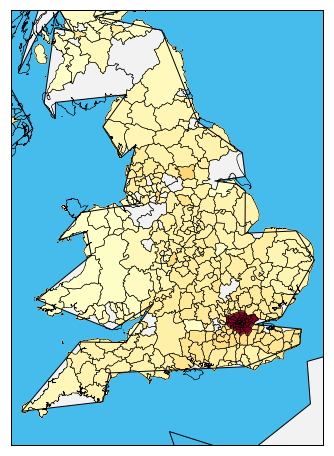

In [5]:
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.colors import rgb2hex
import numpy as np

def readData():
    '''Read data from Train_rev1.csv and count number of job of locations.
    generate location-number of job dict
    '''
    file_name = 'Train_rev1.csv'
    location_dict = {}
    with open(file_name, encoding="ISO-8859-1") as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)
        for data in csv_reader:
            if data[0] == '':
                break
            if data[4] in location_dict.keys():
                location_dict[data[4]] += 1
            else:
                location_dict[data[4]] = 1
    csv_file.close()
    location_dict['Greater London'] = 51520
    return location_dict

def colorMap(location):
    '''generate UK map and color map by number of job of locations'''
    min = 100000000
    max = 0
    totaljob = 0
    for value in location.values():
        totaljob += value
        if int(value) > max:
            max = int(value)
        if int(value) < min:
            min = int(value)
    plt.figure(figsize=(16, 8))
    m = Basemap(resolution='c',  # c, l, i, h, f or None
                projection='merc',
                lat_0=54.5, lon_0=-4.36,
                llcrnrlon=-6., llcrnrlat=49.5, urcrnrlon=2., urcrnrlat=56.2)
    m.drawmapboundary(fill_color='#46bcec')
    m.fillcontinents(color='#f2f2f2', lake_color='#46bcec')
    m.drawcoastlines()
    m.drawcountries(linewidth=1.5)
    m.readshapefile('gadm36_GBR_3', 'states', drawbounds=True)
    newCity = []
    colors = {}
    cmap = plt.cm.get_cmap('YlOrRd')
    vmax = max
    vmin = min
    newState = []
    i = 0
    repert = []
    for area in m.states_info:
        if area['NAME_2'] in location.keys() and m.states[i] not in newState:
            newState.append(m.states[i])
            newCity.append(area['NAME_2'])
        i = i + 1
    jobNum = {}
    for c in newCity:
        jobNum[c] = location[c]
        colors[c] = cmap(np.sqrt((jobNum[c] - vmin) / (vmax - vmin)))[:3]

    ax = plt.gca()
    for nshape, seg in enumerate(newState):
        # print(seg)
        color = rgb2hex(colors[newCity[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor=color)
        ax.add_patch(poly)
    plt.show()

colorMap(readData())


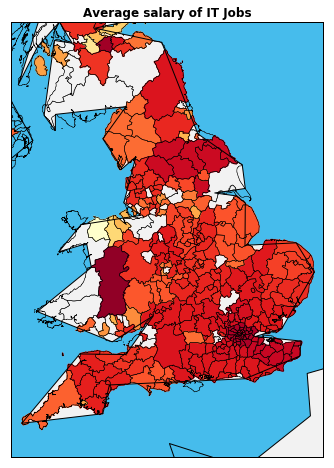

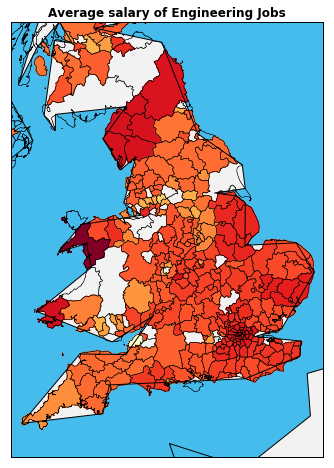

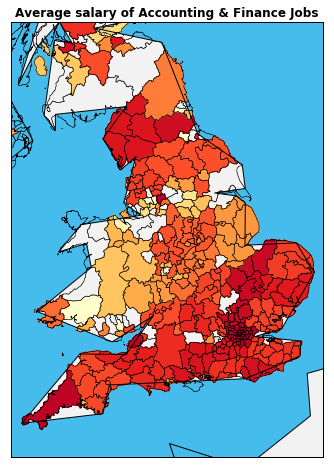

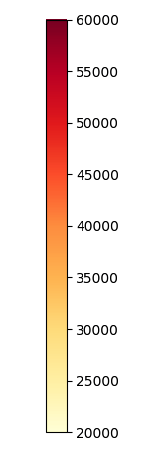

In [52]:
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.colors import rgb2hex
import numpy as np
from PIL import Image

def averagenum(num):
    '''calculate the average value of a list'''
    nsum = 0
    for i in range(len(num)):
        nsum += num[i]
    return nsum / len(num)

def bar():
    plt.figure(figsize=(16, 8))
    img = Image.open('bar.png') 
    plt.imshow(img)
    plt.axis('off')
    plt.show() 
    
def colorMap(location, jobTitle):
    '''generate UK map and color map by average salary of locations'''
    plt.figure(figsize=(16, 8))
    m = Basemap(resolution='c',  # c, l, i, h, f or None
                projection='merc',
                lat_0=54.5, lon_0=-4.36,
                llcrnrlon=-6., llcrnrlat=49.5, urcrnrlon=2., urcrnrlat=56.2)
    m.drawmapboundary(fill_color='#46bcec')
    m.fillcontinents(color='#f2f2f2', lake_color='#46bcec')
    m.drawcoastlines()
    m.drawcountries(linewidth=1.5)
    m.readshapefile('gadm36_GBR_3', 'states', drawbounds=True)
    newCity = []
    colors = {}
    cmap = plt.cm.get_cmap('YlOrRd')
    vmax = 60000
    vmin = 20000
    newState = []
    i = 0
    repert = []
    for area in m.states_info:
        # print(area)
        if area['NAME_2'] in location.keys() and m.states[i] not in newState:
            newState.append(m.states[i])
            newCity.append(area['NAME_2'])
        i = i + 1
    # print(newCity)
    salary = {}
    for c in newCity:
        salary[c] = averagenum(location[c])
        colors[c] = cmap(np.sqrt((salary[c] - vmin) / (vmax - vmin)))[:3]

    ax = plt.gca()
    for nshape, seg in enumerate(newState):
        color = rgb2hex(colors[newCity[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor=color)
        ax.add_patch(poly)
    plt.title(jobTitle,fontsize='large',fontweight='bold')
    plt.show()

def readData(jobTitle):
    '''Read data from Train_rev1.csv and classify salary by location.
    generate location-salary dict
    '''
    file_name = 'Train_rev1.csv'
    location_dict = {}
    with open(file_name, encoding="ISO-8859-1") as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)
        for data in csv_reader:
            if data[0] == '':
                break
            if data[8] == jobTitle:
                if data[4] in location_dict.keys():
                    location_dict[data[4]].append(int(data[10]))
                else:
                    location_dict[data[4]] = [int(data[10])]
    csv_file.close()
    location_dict['Greater London'] = location_dict['South East London'] + location_dict['The City'] +location_dict['London']+ location_dict['Central London']
    return location_dict


colorMap(readData('IT Jobs'),'Average salary of IT Jobs')
colorMap(readData('Engineering Jobs'),'Average salary of Engineering Jobs')
colorMap(readData('Accounting & Finance Jobs'),'Average salary of Accounting & Finance Jobs')
bar()